In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
df = pd.read_json('sample.json') #Read json data
df.head()

,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful
0,rw1133942,OriginalMovieBuff21,Kill Bill: Vol. 2 (2004),8.0,Good follow up that answers all the questions,24 July 2005,0,"After seeing Tarantino's Kill Bill Vol: 1, I g...","[0, 1]"
1,rw1133943,sentra14,Journey to the Unknown (1968– ),NaN,Excellent series,24 July 2005,0,"I have the entire series on video, taped mostl...","[11, 11]"
2,rw1133946,GreenwheelFan2002,The Island (2005),9.0,"Not just about action, but about survival...",24 July 2005,0,Once again the critics prove themselves as mor...,"[2, 5]"
3,rw1133948,itsascreambaby,Win a Date with Tad Hamilton! (2004),3.0,Falls under the category: seen it a million ti...,24 July 2005,0,This IS a film that has been done too many tim...,"[2, 3]"
4,rw1133949,OriginalMovieBuff21,Saturday Night Live: The Best of Chris Farley ...,10.0,"Before Tommy Boy and Black Sheep, there was Sa...",24 July 2005,0,Chris Farley is one of my favorite comedians a...,"[4, 4]"


In [3]:
#Preprocess data

df['rating'] = pd.to_numeric(df['rating'], errors='coerce') #Convert rating data into numeric.
df['rating'] = df['rating']/2 #Divide ratings by 2 the make as in IEEE article.

user_counts = df["reviewer"].value_counts() #Find number of reviews of each user. 
users = user_counts[user_counts >= 20].index.tolist() #Find users with more than 20 reviews.
filtered_df = df[df['reviewer'].isin(users)] #Generate list of users with more than 20 reviews.
filtered_df.head()


,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful
0,rw1133942,OriginalMovieBuff21,Kill Bill: Vol. 2 (2004),4.0,Good follow up that answers all the questions,24 July 2005,0,"After seeing Tarantino's Kill Bill Vol: 1, I g...","[0, 1]"
4,rw1133949,OriginalMovieBuff21,Saturday Night Live: The Best of Chris Farley ...,5.0,"Before Tommy Boy and Black Sheep, there was Sa...",24 July 2005,0,Chris Farley is one of my favorite comedians a...,"[4, 4]"
5,rw1133950,Aaron1375,Outlaw Star (1998– ),5.0,Great anime series soars through the stars.,24 July 2005,0,"I love this anime series, my only complaint is...","[11, 12]"
8,rw1133954,diand_,The Amityville Horror (2005),1.5,Laid-back horror,24 July 2005,0,The Amityville Horror is once again a horror m...,"[0, 1]"
10,rw1133956,Aaron1375,Phantasm III: Lord of the Dead (1994),3.0,Be careful of what you wish for.,24 July 2005,0,The first installment of this series explained...,"[0, 4]"


In [4]:
R = pd.pivot_table(filtered_df, values='rating', index='reviewer', columns='movie') #Generate user-item matrix
R

movie,$ (1971),'G' Men (1935),'Halloween' Unmasked 2000 (1999 Video),'Hellboy': The Seeds of Creation (2004),'It's Alive!' (1969 TV Movie),'R Xmas (2001),'Round Midnight (1986),"'Sheba, Baby' (1975)",'Weird Al' Yankovic: The Ultimate Video Collection (2003 Video),(T)Raumschiff Surprise - Periode 1 (2004),...,"¡Ay, Carmela! (1990)",¿Dónde estás amor de mi vida que no te puedo encontrar? (1992),À Nos Amours (1983),À la folie... pas du tout (2002),À mort l'arbitre! (1984),Æon Flux (2005),Ça commence aujourd'hui (1999),Çilgin kiz ve üç süper adam (1973),Échec au porteur (1958),Élise ou la vraie vie (1970)
reviewer,,,,,,,,,,,,,,,,,,,,,
AZINDN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron1375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andreas_N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antagonisten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Atavisten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wmorrow59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
world_of_weird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wrestlingsitewebmaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
col_means = R.mean(axis=0) #Find rating means of columns in user-item matrix
row_means = R.mean(axis=1) #Find rating means of rows in user-item matrix
col_means, row_means 

(movie
 $ (1971)                                   3.5
 'G' Men (1935)                             4.0
 'Halloween' Unmasked 2000 (1999 Video)     5.0
 'Hellboy': The Seeds of Creation (2004)    3.5
 'It's Alive!' (1969 TV Movie)              3.0
                                           ... 
 Æon Flux (2005)                            3.0
 Ça commence aujourd'hui (1999)             4.5
 Çilgin kiz ve üç süper adam (1973)         3.5
 Échec au porteur (1958)                    3.5
 Élise ou la vraie vie (1970)               4.0
 Length: 11321, dtype: float64,
 reviewer
 AZINDN                    3.630435
 Aaron1375                 3.516667
 Andreas_N                 4.000000
 Antagonisten              2.776316
 Atavisten                 3.050000
                             ...   
 wmorrow59                 3.680556
 world_of_weird            1.818182
 wrestlingsitewebmaster    3.743243
 writers_reign             3.720472
 zetes                     3.772727
 Length: 362, dtype: float6

In [6]:
R_filled = R.apply(lambda col: col.fillna(col_means[col.name]), axis=0) #Fill null values in user-item matrix with column means

R_filled

movie,$ (1971),'G' Men (1935),'Halloween' Unmasked 2000 (1999 Video),'Hellboy': The Seeds of Creation (2004),'It's Alive!' (1969 TV Movie),'R Xmas (2001),'Round Midnight (1986),"'Sheba, Baby' (1975)",'Weird Al' Yankovic: The Ultimate Video Collection (2003 Video),(T)Raumschiff Surprise - Periode 1 (2004),...,"¡Ay, Carmela! (1990)",¿Dónde estás amor de mi vida que no te puedo encontrar? (1992),À Nos Amours (1983),À la folie... pas du tout (2002),À mort l'arbitre! (1984),Æon Flux (2005),Ça commence aujourd'hui (1999),Çilgin kiz ve üç süper adam (1973),Échec au porteur (1958),Élise ou la vraie vie (1970)
reviewer,,,,,,,,,,,,,,,,,,,,,
AZINDN,3.5,4.0,5.0,3.5,3.0,4.0,4.0,2.0,4.5,3.5,...,3.0,4.0,2.5,4.25,3.5,3.0,4.5,3.5,3.5,4.0
Aaron1375,3.5,4.0,5.0,3.5,3.0,4.0,4.0,2.0,4.5,3.5,...,3.0,4.0,2.5,4.25,3.5,3.0,4.5,3.5,3.5,4.0
Andreas_N,3.5,4.0,5.0,3.5,3.0,4.0,4.0,2.0,4.5,3.5,...,3.0,4.0,2.5,4.25,3.5,3.0,4.5,3.5,3.5,4.0
Antagonisten,3.5,4.0,5.0,3.5,3.0,4.0,4.0,2.0,4.5,3.5,...,3.0,4.0,2.5,4.25,3.5,3.0,4.5,3.5,3.5,4.0
Atavisten,3.5,4.0,5.0,3.5,3.0,4.0,4.0,2.0,4.5,3.5,...,3.0,4.0,2.5,4.25,3.5,3.0,4.5,3.5,3.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wmorrow59,3.5,4.0,5.0,3.5,3.0,4.0,4.0,2.0,4.5,3.5,...,3.0,4.0,2.5,4.25,3.5,3.0,4.5,3.5,3.5,4.0
world_of_weird,3.5,4.0,5.0,3.5,3.0,4.0,4.0,2.0,4.5,3.5,...,3.0,4.0,2.5,4.25,3.5,3.0,4.5,3.5,3.5,4.0
wrestlingsitewebmaster,3.5,4.0,5.0,3.5,3.0,4.0,4.0,2.0,4.5,3.5,...,3.0,4.0,2.5,4.25,3.5,3.0,4.5,3.5,3.5,4.0


In [7]:
R_norm = R_filled.sub(row_means, axis=0) # Subtract the corresponding row averages to construct normalized matrix
R_norm 

movie,$ (1971),'G' Men (1935),'Halloween' Unmasked 2000 (1999 Video),'Hellboy': The Seeds of Creation (2004),'It's Alive!' (1969 TV Movie),'R Xmas (2001),'Round Midnight (1986),"'Sheba, Baby' (1975)",'Weird Al' Yankovic: The Ultimate Video Collection (2003 Video),(T)Raumschiff Surprise - Periode 1 (2004),...,"¡Ay, Carmela! (1990)",¿Dónde estás amor de mi vida que no te puedo encontrar? (1992),À Nos Amours (1983),À la folie... pas du tout (2002),À mort l'arbitre! (1984),Æon Flux (2005),Ça commence aujourd'hui (1999),Çilgin kiz ve üç süper adam (1973),Échec au porteur (1958),Élise ou la vraie vie (1970)
reviewer,,,,,,,,,,,,,,,,,,,,,
AZINDN,-0.130435,0.369565,1.369565,-0.130435,-0.630435,0.369565,0.369565,-1.630435,0.869565,-0.130435,...,-0.630435,0.369565,-1.130435,0.619565,-0.130435,-0.630435,0.869565,-0.130435,-0.130435,0.369565
Aaron1375,-0.016667,0.483333,1.483333,-0.016667,-0.516667,0.483333,0.483333,-1.516667,0.983333,-0.016667,...,-0.516667,0.483333,-1.016667,0.733333,-0.016667,-0.516667,0.983333,-0.016667,-0.016667,0.483333
Andreas_N,-0.500000,0.000000,1.000000,-0.500000,-1.000000,0.000000,0.000000,-2.000000,0.500000,-0.500000,...,-1.000000,0.000000,-1.500000,0.250000,-0.500000,-1.000000,0.500000,-0.500000,-0.500000,0.000000
Antagonisten,0.723684,1.223684,2.223684,0.723684,0.223684,1.223684,1.223684,-0.776316,1.723684,0.723684,...,0.223684,1.223684,-0.276316,1.473684,0.723684,0.223684,1.723684,0.723684,0.723684,1.223684
Atavisten,0.450000,0.950000,1.950000,0.450000,-0.050000,0.950000,0.950000,-1.050000,1.450000,0.450000,...,-0.050000,0.950000,-0.550000,1.200000,0.450000,-0.050000,1.450000,0.450000,0.450000,0.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wmorrow59,-0.180556,0.319444,1.319444,-0.180556,-0.680556,0.319444,0.319444,-1.680556,0.819444,-0.180556,...,-0.680556,0.319444,-1.180556,0.569444,-0.180556,-0.680556,0.819444,-0.180556,-0.180556,0.319444
world_of_weird,1.681818,2.181818,3.181818,1.681818,1.181818,2.181818,2.181818,0.181818,2.681818,1.681818,...,1.181818,2.181818,0.681818,2.431818,1.681818,1.181818,2.681818,1.681818,1.681818,2.181818
wrestlingsitewebmaster,-0.243243,0.256757,1.256757,-0.243243,-0.743243,0.256757,0.256757,-1.743243,0.756757,-0.243243,...,-0.743243,0.256757,-1.243243,0.506757,-0.243243,-0.743243,0.756757,-0.243243,-0.243243,0.256757


In [8]:
ATA = np.dot(R_norm.T, R_norm) #Compute covariance matrix by multipling the transpore of the matrix A with itself


In [ ]:
def QR_Decomposition(A):
    n, m = A.shape #Get the shape of matrix A
    Q = np.empty((n, n)) #Initialize matrix Q 
    R = np.zeros((n, m)) #Initialize matrix R

    
    for i in range(n): #Iterate through the columns of A
        u = A[:, i].copy().astype(float)  # Create a copy of the column vector to avoid modifying the original matrix and ensure that the data type is compatible

        for j in range(i): 
            R[j, i] = Q[:, j].dot(A[:, i])  # Compute and store R values
            u -= R[j, i] * Q[:, j] # Subtract the projections on previously computed Q vectors from u
        R[i, i] = np.linalg.norm(u) #Compute the norm of the u
        Q[:, i] = u / R[i, i] # Normalize u and store it in Q



    return Q, R #Return Q and R matrices

def SVD(A, max_iter=100, tol=1e-6):
    
    Q, R = QR_Decomposition(A)  # Perform QR decomposition on A
    m, n = A.shape #Get the shape of matrix A
    
    # Initialize U and V matrices
    U = Q
    V = np.eye(n)
    
    for i in range(max_iter): # Iterate to refine the decomposition
        
        Q1, R1 = QR_Decomposition(R) # Perform QR decomposition on R
        Q2, R2 = QR_Decomposition(np.linalg.inv(R1))  # Perform QR decomposition on inverse of R1
        
        # Update U and V matrices
        U = U @ Q1
        V = V @ Q2
        
        S = np.diag(R1) # Calculate singular values from R1, place them diagonally in matrix S
        
        
        diff = np.linalg.norm(R - R1) # Calculate convergence
        if diff < tol: #Check convergence
            break
        
        
        R = R1 # Update R for the next iteration
    
    
    V = np.linalg.inv(R) @ np.linalg.inv(R2) @ V  # Compute V by multiplying with inverses of R1 and R2
    
    return U, S, V #Return matrices U, S and V

# U, S, V = SVD(ATA)
# U, S, V
q, r = QR_Decomposition(ATA)
with open('QR_factorization.txt', 'w') as f:
    f.write(Q,R)
f.close()

In [10]:
def generateSimilarityMatrix(U, S, V, k, neighborhood_size):
    # Keep only the first k singular values and corresponding columns in U and rows in VT   
    Uk = U[:, :k]  # Keep the first k columns of U
    Sk = np.diag(np.diag(S[:k]))  # Create a diagonal matrix with the first k singular values
    VTk = V.T[:k, :]  # Keep the first k rows of the transposed V (VT)
    
    R_red = np.dot(np.dot(Uk, Sk), VTk)  # Reconstruct the reduced user-item matrix R_red using the truncated SVD components
    
    Sk_root = np.sqrt(Sk)  # Compute the square root of the diagonal matrix Sk
    
    N = np.dot(Uk, Sk_root.T)  # Project users into the k-dimensional feature space
    M = np.dot(Sk_root, VTk)  # Project movies into the k-dimensional feature space

    num_items = N.shape[0]  # Retrieve the number of rows in the array N.
    similarity_matrix = np.zeros((num_items, num_items))  # Initialize a symmetric matrix with full of zeros to store item-item similarities

    # Compute cosine similarity matrix between items based on their k-dimensional representations

    for item_j in range(num_items):
        for item_f in range(num_items):
            if item_j != item_f: #Exclude similarity with itself
                numerator = np.dot(N[item_j], N[item_f]) # Compute dot product of user projections
                denominator = np.linalg.norm(N[item_j]) * np.linalg.norm(N[item_f]) #Compute norms for cosine similarity
                if denominator != 0: #Avoid division by zero
                    adj_cos_sim = numerator / denominator # Compute adjusted cosine similarity
                    similarity_matrix[item_j, item_f] = adj_cos_sim  #Store the adjusted cosine similarity in similarity matrix

    # Adjust similarity matrix based on neighborhood size
    adjusted_similarity_matrix = np.zeros_like(similarity_matrix) # Create a new matrix with the same shape as similarity_matrix 
    for item_j in range(num_items):
        top_similar_indices = np.argsort(similarity_matrix[item_j])[::-1][:neighborhood_size] #Find top similar items
        for item_f in top_similar_indices:
            adjusted_similarity_matrix[item_j, item_f] = similarity_matrix[item_j, item_f] #Update adjusted matrix with similarity matrix

    return adjusted_similarity_matrix, R_red #Return similarity matrix and reduced matrix

In [11]:
def generatePrediction(similarityMatrix, R_red):
    num_items = similarityMatrix.shape[0] #Retrieve the number of rows in the similarity matrix
    prediction = 0 #Initialize prediction value to be computed
    denominator = 0 #Initialize the denominator
    numerator = 0 #Initialize the numerator
    
    #Specify the active user and active item for which to generate a prediction
    user = 2
    movie = 2
    
    for item_j in range(num_items): # Iterate through each movie to compute the prediction for the user and movie
        if item_j != movie:  # Exclude similarity with the active item
            sim_jk = similarityMatrix[item_j, movie] #Retrieve similarity between item_j and movie
            rating_ajk = R_red[user, item_j]  #Retrieve the rating of the user for item_j in the reduced matrix
    
            user_rating_avg = row_means.iloc[user]  # Retrieve the average rating of the user
            numerator += sim_jk * (rating_ajk + user_rating_avg) # Compute the weighted sum of ratings and similarities
            denominator += abs(sim_jk) # Add absolute similarities 
    
    if denominator != 0: #Avoid division by zero
        prediction = numerator / denominator #Compute the prediction by dividing numerator by denominator
    else:
        prediction = user_rating_avg  # Default to user average if denominator is 0
    return prediction #Return the prediction for specified user and movie
     
    

In [20]:
k_values = [2, 4, 6, 8, 10, 20] #Define k values
neighborhood_size = [20, 60, 80] #Define neighborhood sizes

def findPredictions(k_values, neighborhood_size)->dict:
    predictions = {} # Initialize dictionary to store predictions
    for i in neighborhood_size: #Iterate through the list containing neighborhood sizes
        predictions[i] = []  # Create an empty list for each neighborhood size
        for k in k_values: #Iterate through the list containing k values 
            sim, R_red = generateSimilarityMatrix(U, S, V, k, i) # Generate similarity matrix and reduced matrix using U, S, V, k, and neighborhood size
            prediction = generatePrediction(sim, R_red) # Generate prediction based on the similarity matrix and reduced matrix
            predictions[i].append(prediction)   # Append the prediction to the list corresponding to the neighborhood size
    return predictions #Return the dictionary containing predictions


def findError(predictions, realValue):
    sub = {key: [value - realValue for value in values] for key, values in predictions.items()}  # Subtract real value from each predicted value for each neighborhood size
    err = {key: [abs(value) for value in values] for key, values in sub.items()}  # Calculate absolute error for each predicted value for each neighborhood size
    return err #Return the dictionary containing error values


predictions = findPredictions(k_values, neighborhood_size) #Generate predictions for specified k values and neighborhood sizes
err = findError(predictions, 4) #Calculate the error between predicted values and the real value 

        


In [ ]:
def generatePredictionsGraph(predictions):
    plt.style.use('ggplot') #Set the plot style
    plt.figure(figsize=(10, 6))  # Set the figure size
    
    for key, values in predictions.items(): #Iterate through the element in predictions dictionary
        plt.plot(k_values, values, label=f'Neighborhood Size = {key}') #Plot the k values and corresponding predictions for each neighborhood size
    
    plt.xlabel('k values') #Set label of x-axis
    plt.ylabel('Predictions') #Set label of y-axis
    plt.title('Predictions vs. k values') #Set title of the plot
    plt.legend() #Show legend with neighborhood size labels
    plt.grid(True) #Show grid on  the plot
    plt.show() #Display the plot
    
def generateErrorGraph(err):
    plt.style.use('ggplot')  #Set the plot style
    plt.figure(figsize=(10, 6))  # Set the figure size
    
    for key, values in err.items():  #Iterate through the element in error dictionary 
        plt.plot(k_values, values, label=f'Neighborhood Size = {key}') #Plot the k values and corresponding errors for each neighborhood size
    
    plt.xlabel('k values') #Set label of x-axis
    plt.ylabel('Absolute errors') #Set label of y-axis
    plt.title('Absolute errors vs. k values') #Set title of the plot
    plt.legend() #Show legend with neighborhood size labels
    plt.grid(True) #Show grid on the plot
    plt.show() #Display the plot


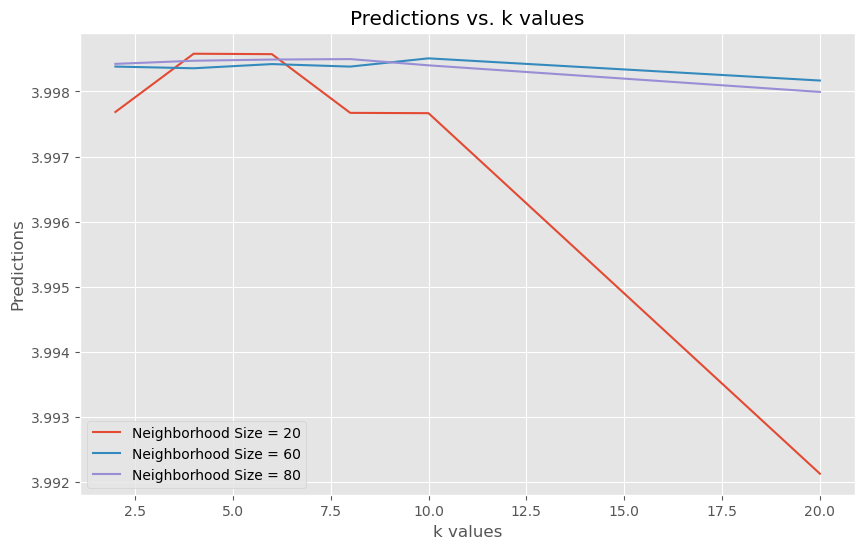

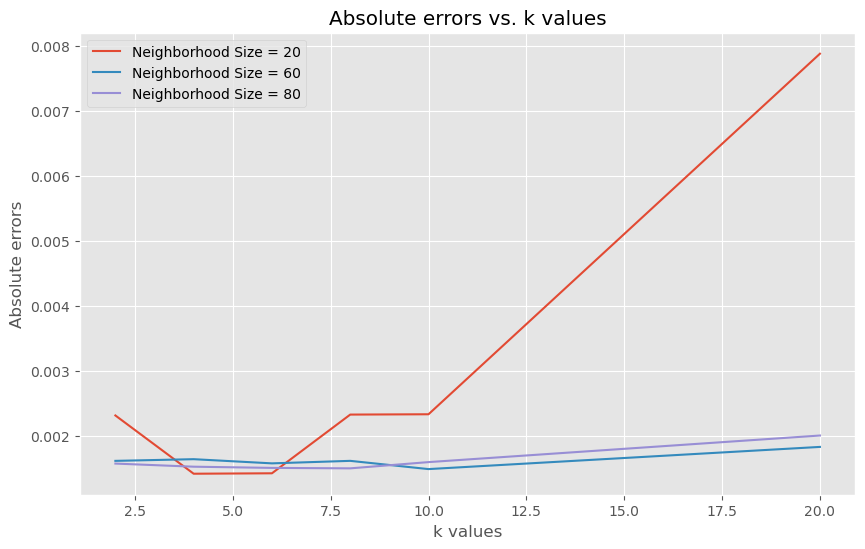

In [22]:
generatePredictionsGraph(predictions)

generateErrorGraph(err)